# Test IVisual-Jupyter Travelling Wave

This notebook is set up to test the visualization of a QM travelling wave. The arrows represent phasors (y and z are the real and imaginary parts of the complex wavefunction respectively). The first next cell just sets up the arrows and the following cell does the animation, while tracking in the time between calls to 'rate()'.

In [1]:
"""
Execute this cell only once to set up the arrows
"""

%matplotlib inline
import matplotlib.pyplot as pl
import numpy as np
from ivisual import *
from math import *

scene = canvas(title = "Travelling Wave")

L=6.0                          # range of x is 6 units
x = np.linspace(-L/2, L/2, 20) # from -3 to +3
k = -3*pi/L                    # set up the wave number
psi = np.exp(1j*k*x)           # set up the initial wave function

alist = []                     # an empty list for our arrow objects

omega = 2*pi                   # 1 rev/sec
t=0.0                          # start t at zero
dt=0.01                        # 1/100 of a second per step

def once(r=30):  #
    global t
    rate(r)
    t+=dt
    psi_t = psi*np.exp(-1j*omega*t) # evolve the wf in time
    for i in range(len(x)):
        SetArrowFromCN(psi_t[i], alist[i]) # move the arrows to match

def SetArrowFromCN( cn, a):
    """
    SetArrowWithCN takes a complex number  cn  and an arrow object  a .
    It sets the  y  and  z  components of the arrow s axis to the real 
    and imaginary parts of the given complex number. 
    """
    a.axis.y = cn.real
    a.axis.z = cn.imag
    
for i in range(len(x)):
    xi = x[i]                              
    a = arrow(pos=vector(xi, 0, 0),       # on the y,z axis at location 'x'
                axis=vector(0,1,0),       # pointing in the 'real' direction
                color=color.red)          # make it red. ;->
    alist.append(a)                       # add to list
    SetArrowFromCN( psi[i], a)            # set up arrow from wave function


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Done!

average :  0.0334040002823
median :  0.0329999923706
std dev :  0.00501486154737


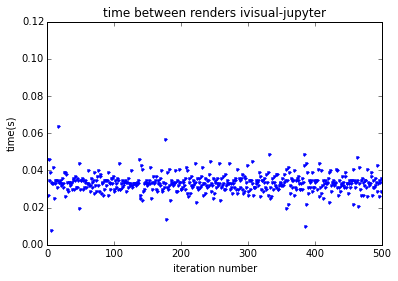

In [3]:
"""
Execute this cell to evolve the WF in time
"""
from time import time, sleep
    
tlist=[time()]
for i in range(500):
    once(30)
    tlist.append(time())
    
tarr = np.array(tlist)
dts = tarr[1:]-tarr[:-1]
        
    
print("Done!")

tarr = np.array(tlist)
dts = tarr[1:]-tarr[:-1]
pl.plot(range(len(dts)), dts, 'b.')
pl.title("time between renders ivisual-jupyter")
pl.xlabel("iteration number")
pl.ylabel("time(s)")#
pl.ylim([0.0,0.12])

print
print "average : ", np.average(dts)
print "median : ", np.median(dts)
print "std dev : ", np.std(dts)

